In [1]:
#This jupyter notebook is prepared by "Tulio Contramaestre"

## 1. Load data and perform general EDA

In [2]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import scipy as stats
import sklearn as sklrn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [62]:
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tulio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
text = [line.rstrip() for line in open("news.csv")]
print(len(text))

44955


In [5]:
for message in text[:10]:
    print(message)
    print('\n')

title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [6]:
data = pd.read_csv("news.csv", sep = '\t')

In [7]:
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


### IV. Null Check

<AxesSubplot:>

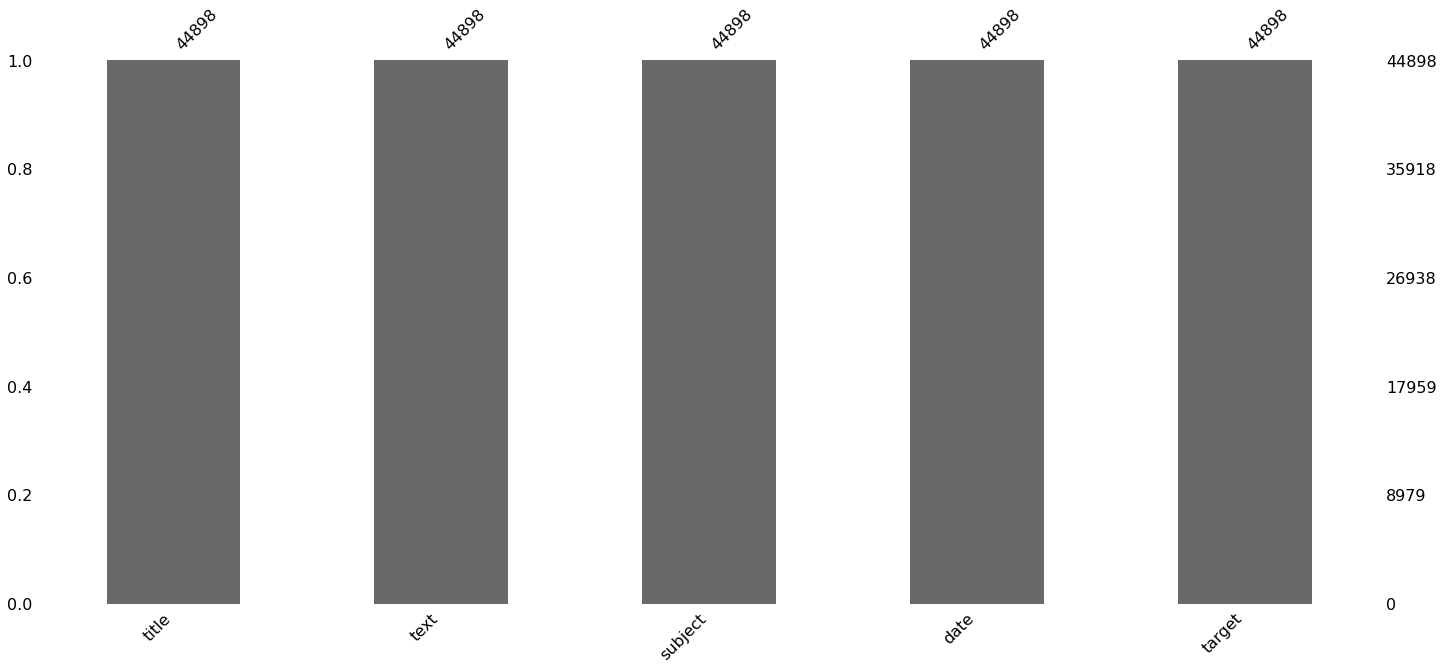

In [9]:
msno.bar(data)

In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

No null values

### V. Counterplot

<function matplotlib.pyplot.show(close=None, block=None)>

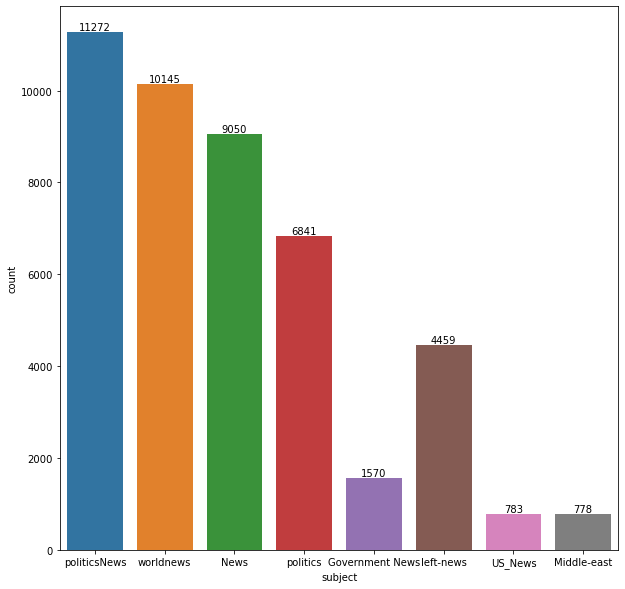

In [11]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = 'subject', data= data)
plot.bar_label(plot.containers[0])
plt.show

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

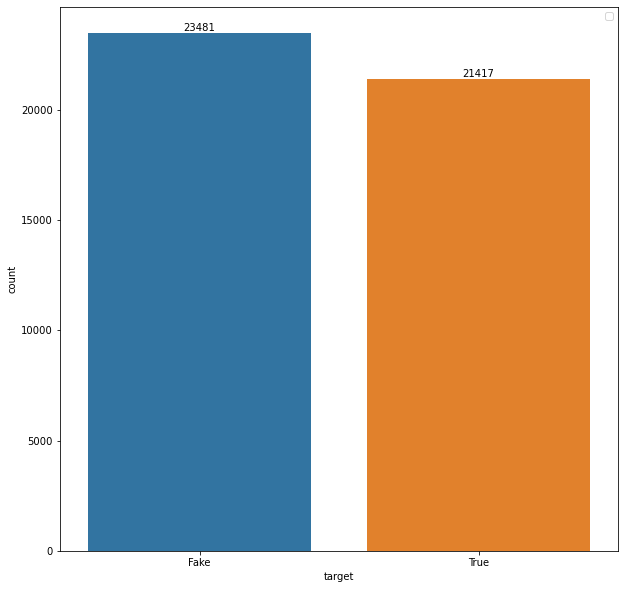

In [12]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = 'target', data= data)
plot.bar_label(plot.containers[0])
plt.legend(loc = "upper right")
plot.set_xticklabels(["Fake", "True"])
plt.show

### VII. word clouds

#### Fake news

In [13]:
falseNews = data.loc[data['target'] == 0, ['text']]

In [14]:
falseNews

,text
21417,Donald Trump just couldn t wish all Americans ...
21418,House Intelligence Committee Chairman Devin Nu...
21419,"On Friday, it was revealed that former Milwauk..."
21420,"On Christmas day, Donald Trump announced that ..."
21421,Pope Francis used his annual Christmas Day mes...
...,...
44893,21st Century Wire says As 21WIRE reported earl...
44894,21st Century Wire says It s a familiar theme. ...
44895,Patrick Henningsen 21st Century WireRemember ...
44896,21st Century Wire says Al Jazeera America will...


In [15]:
fakeNewsText = " ".join(text for text in falseNews['text'])

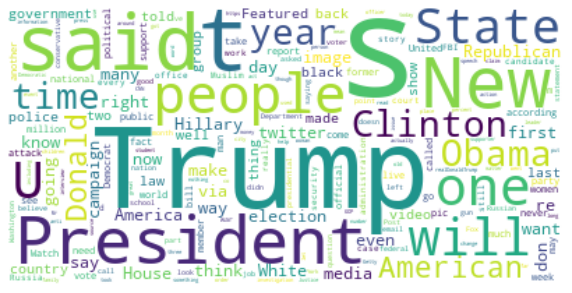

In [16]:
word_cloud = WordCloud(collocations= False, background_color= 'white').generate(fakeNewsText)
plt.figure(figsize= (10, 10))
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

As we can see above the fake news word cloud focuses highly on the president and another surrounding names such as clinton or obama. New and will also seem to be decently prevelant. This could be due to the fact that these words can attract more readers.

#### True news

In [17]:
trueNews = data.loc[data['target'] == 1, ['text']]

In [18]:
trueNews

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413,"LONDON (Reuters) - LexisNexis, a provider of l..."
21414,MINSK (Reuters) - In the shadow of disused Sov...
21415,MOSCOW (Reuters) - Vatican Secretary of State ...


In [19]:
trueNewsText = " ".join(text for text in trueNews['text'])

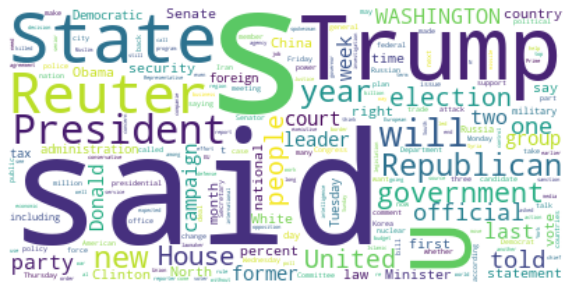

In [20]:
word_cloud = WordCloud(collocations= False, background_color= 'white').generate(trueNewsText)
plt.figure(figsize= (10, 10))
plt.imshow(word_cloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

As we can see for the True news words such as "Said", "state", "government" are a bit more prominent in comparison to fake news text. This could be related to the idea of quouting people or researchers, since the articles tend to be a bit more credible when it is considere "true" news.

### VIII. "Alltext" column

In [21]:
cols = ['title', 'text', 'subject']
data['AllText'] = data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [22]:
# data['AllText'] = data['title'] + " " + data['text'] + " " + data['subject']

In [23]:
data.head()

,title,text,subject,date,target,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


### IX. Copy

In [24]:
data_copy = data.copy()

### X. drop tittle,text,subject

In [25]:
data = data.drop(['text', 'title', 'subject', 'date'], axis= 1)

In [26]:
data

,target,AllText
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,0,How to Blow $700 Million: Al Jazeera America F...


### Xi. calculate the length

In [27]:
data['AllText']

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
44893    McPain: John McCain Furious That Iran Treated ...
44894    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896    How to Blow $700 Million: Al Jazeera America F...
44897    10 U.S. Navy Sailors Held by Iranian Military ...
Name: AllText, Length: 44898, dtype: object

In [28]:
data['length'] = data['AllText'].apply(len)

In [29]:
data

,target,AllText,length
0,1,"As U.S. budget fight looms, Republicans flip t...",4737
1,1,U.S. military to accept transgender recruits o...,4155
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2863
3,1,FBI Russia probe helped by Australian diplomat...,2534
4,1,Trump wants Postal Service to charge 'much mor...,5287
...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,3311
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,1778
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,25163
44896,0,How to Blow $700 Million: Al Jazeera America F...,2765


### XII. histograms for length

#### True news

<AxesSubplot:ylabel='Frequency'>

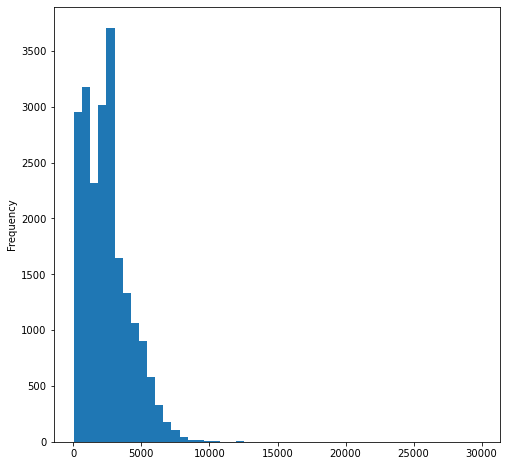

In [30]:
plt.figure(figsize= (8, 8))
trueNewsLength = data.loc[data['target'] == 1, ['length']]
trueNewsLength['length'].plot(bins = 50, kind = 'hist')

In [31]:
trueNewsLength['length'].describe()

count    21417.000000
mean      2460.525330
std       1684.570421
min         45.000000
25%        991.000000
50%       2299.000000
75%       3314.000000
max      29862.000000
Name: length, dtype: float64

As we can see from the graph most true news articles ranged from 4500 in length to around 1000 in length with an average frequency of about 2500 articles

#### Fake News

<AxesSubplot:ylabel='Frequency'>

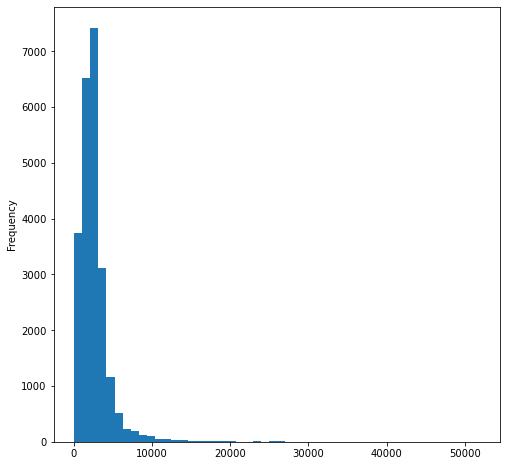

In [32]:
plt.figure(figsize= (8, 8))
fakeNewsLength = data.loc[data['target'] == 0, ['length']]
fakeNewsLength['length'].plot(bins = 50, kind = 'hist')

In [33]:
fakeNewsLength['length'].describe()

count    23481.000000
mean      2650.776585
std       2533.693816
min         40.000000
25%       1539.000000
50%       2265.000000
75%       3133.000000
max      51905.000000
Name: length, dtype: float64

As we can see from the graph almost all fake news articles were around the 2500 length. This can also be seen with it's high frequency of around 7500 articles. There isn't a lot of variance in lengths in comparison to True news articles, which have slightly broader histogram and lower frequencies. 

### XIII. 

TFID = TFID stands for ter frequencey - inverse document frequency. It is used to give a measure to a word to show how important the word is based on the use of the word in all the documents.

Bag of words with sklearn: A bag of words in sklearn is called a CountVectorizer. the countvectorizer needs to first get imported. After it is imported it needs to be created. After that you need to feed the vectorizer documents that are in the form of a string. the data (strings) need to be fit into the vectorizer. Then after the words need to be transformed, which is when the count is created.

A TFID can be generated for the bag of words using the TFIDtransformer and TFIDvectorizer. normalization is implemented by the TFID transformer

## 2. Train Test Split

In [34]:
AllText_train, AllText_test, target_train, target_test = train_test_split(data['AllText'], data['target'], test_size= .2, random_state = 0)

#### Train set count plot

<function matplotlib.pyplot.show(close=None, block=None)>

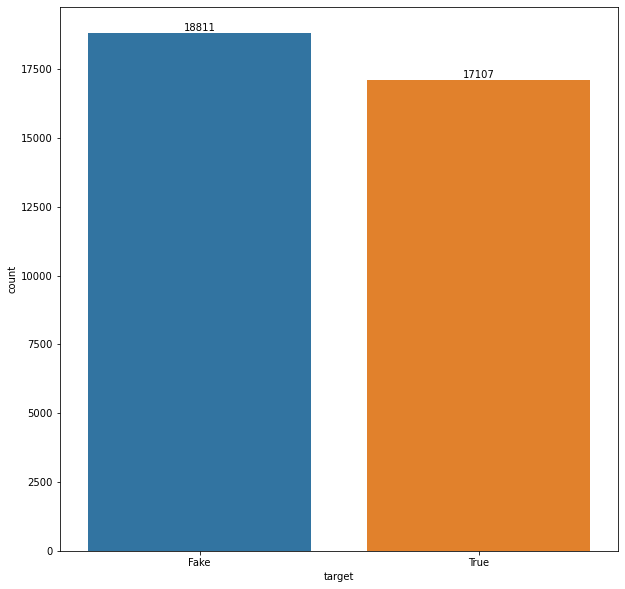

In [35]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = target_train)
plot.bar_label(plot.containers[0])
plot.set_xticklabels(["Fake", "True"])
plt.show

#### test set countplot

<function matplotlib.pyplot.show(close=None, block=None)>

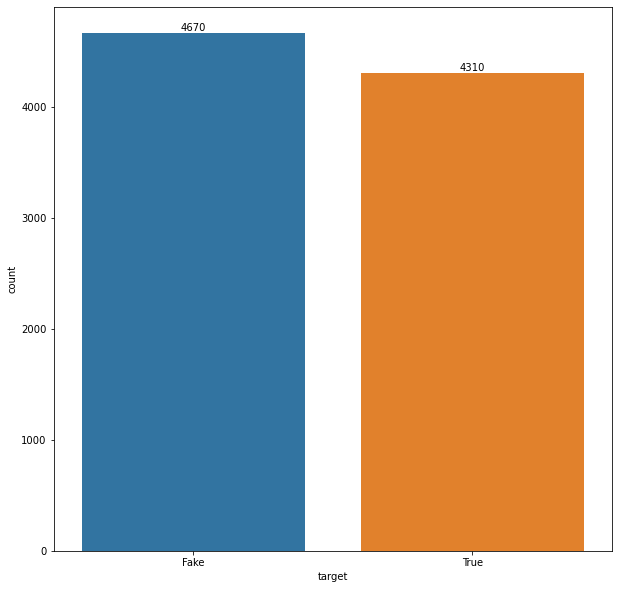

In [36]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = target_test)
plot.bar_label(plot.containers[0])
plot.set_xticklabels(["Fake", "True"])
plt.show

## 3. Training and Testing Fake News classifier using multinomialNB

In [37]:
stemmer = LancasterStemmer()

In [38]:
def text_process(mess):

    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

In [39]:
pipelineNB = Pipeline([('bow', CountVectorizer(analyzer= text_process)), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [40]:
pipelineNB.fit(AllText_train, target_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B1EBA451F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
predictionMNB = pipelineNB.predict(AllText_test)

In [42]:
print(classification_report(target_test, predictionMNB))
print(confusion_matrix(target_test, predictionMNB))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4670
           1       0.96      0.95      0.95      4310

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

[[4478  192]
 [ 197 4113]]


The model is very accurate due to it's high accuracy (96%). This can be seen from the classification report above the model also had a high precision score of 96%. The model does a very good job at deciding whether a news article is fake news or true news, based of the data from the classification report.

### V. news article of my choice

In [43]:
newArticle = "Russians plunder $5M farm vehicles from Ukraine -- to find they've been remotely disabled (CNN)Russian troops in the occupied city of Melitopol have stolen all the equipment from a farm equipment dealership -- and shipped it to Chechnya, according to a Ukrainian businessman in the area. But after a journey of more than 700 miles, the thieves were unable to use any of the equipment -- because it had been locked remotely. Over the past few weeks there's been a growing number of reports of Russian troops stealing farm equipment, grain and even building materials - beyond widespread looting of residences. But the removal of valuable agricultural equipment from a John Deere dealership in Melitopol speaks to an increasingly organized operation, one that even uses Russian military transport as part of the heist. CNN has learned that the equipment was removed from an Agrotek dealership in Melitopol, which has been occupied by Russian forces since early March. Altogether it's valued at nearly $5 million. The combine harvesters alone are worth $300,000 each. CNN is not naming a contact in Melitopol familiar with the details of the case for their own safety. The contact said the process began with the seizure of two combine harvesters, a tractor and a seeder. Over the next few weeks, everything else was removed: in all 27 pieces of farm machinery. One of the flat-bed trucks used, and caught on camera, had a white \"Z\" painted on it and appeared to be a military truck."

In [44]:
pipelineNB.predict([newArticle])

array([1], dtype=int64)

## 4. Training and Testing a Deep Neural Network

In [45]:
pipelineMLP = Pipeline([('bow', CountVectorizer(analyzer=text_process)), ('tfidf', TfidfTransformer()), ('classifier', MLPClassifier(verbose = 2, hidden_layer_sizes=(100,4), random_state=0, early_stopping=True))])

In [46]:
pipelineMLP.fit(AllText_train, target_train)

Iteration 1, loss = 0.21139178
Validation score: 0.994989
Iteration 2, loss = 0.01604617
Validation score: 0.996938
Iteration 3, loss = 0.00468437
Validation score: 0.997494
Iteration 4, loss = 0.00247776
Validation score: 0.997773
Iteration 5, loss = 0.00171587
Validation score: 0.997773
Iteration 6, loss = 0.00134731
Validation score: 0.997773
Iteration 7, loss = 0.00113292
Validation score: 0.997773
Iteration 8, loss = 0.00099114
Validation score: 0.997773
Iteration 9, loss = 0.00089001
Validation score: 0.997773
Iteration 10, loss = 0.00081235
Validation score: 0.998051
Iteration 11, loss = 0.00075018
Validation score: 0.998051
Iteration 12, loss = 0.00069816
Validation score: 0.998051
Iteration 13, loss = 0.00065360
Validation score: 0.997773
Iteration 14, loss = 0.00061427
Validation score: 0.998051
Iteration 15, loss = 0.00057921
Validation score: 0.998051
Iteration 16, loss = 0.00054732
Validation score: 0.998051
Iteration 17, loss = 0.00051819
Validation score: 0.998051
Iterat

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B1EBA451F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [47]:
predictionMLP = pipelineMLP.predict(AllText_test)

In [48]:
print(classification_report(target_test, predictionMLP))
print(confusion_matrix(target_test, predictionMLP))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4670
           1       0.99      1.00      1.00      4310

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4646   24]
 [  11 4299]]


As we can see from the confusion matrix and classification report, the deep neural network does a lot better job a classification with a 100% accuracy rate. The model does a really good job at prediciting true news from fake news with almost no missclassifications. The downside would the time taken to fit the model. It considerably longer than MultinomialMB, but the increase in accuracy makes it worth it. Its precision also dips to 99%, but that should not be too much of a problem. Since we can see from the the confusion matrix a very little amout was actually missclassified.

### V.Deep neural network model on my news article

In [49]:
pipelineMLP.predict([newArticle])

array([0], dtype=int64)

### VII. disscussion

There is a somewhat noticebale difference between the performance of the NB model and the deep learning model. The most obvious one can be seen by how it predicst on the news article I found. The NB model predicst a 1 meaning it is true news, while the MLP (deep learning model) predicst a 0 meaning fake news. The MLP model also has an accuracy of 100% in comparison to the 96% accuracy of the NB model. The MLP model has a higher success rate than the NB model. the MLP model also averages a value of 1.0 or 100% for most of the data in the classification matrix, while the NB averages a value of .96 or 96%. Further reinforcing the fact that the MLP (deep neural network) is far more accurate then the NB model.

## 5. Extra credit

In [50]:
data_no_alltext = data_copy.drop(['AllText', 'target', 'date'], axis= 1)

In [51]:
data_no_alltext

,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east


<function matplotlib.pyplot.show(close=None, block=None)>

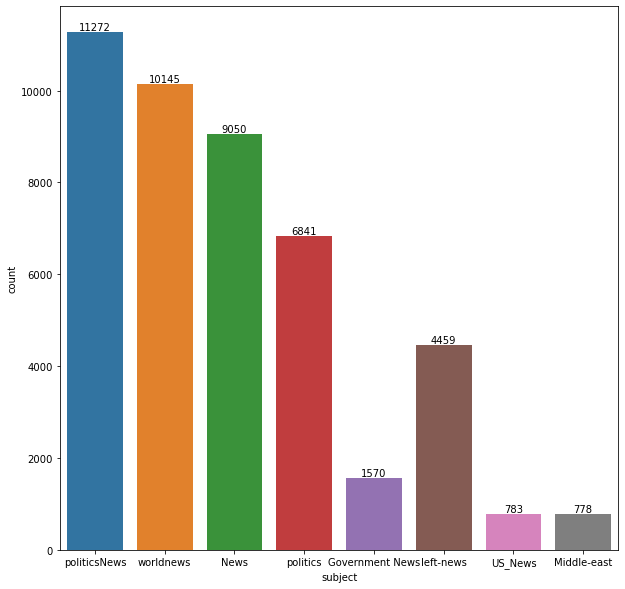

In [52]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = 'subject', data= data_copy)
plot.bar_label(plot.containers[0])
plt.show

In [53]:
cols = ['title', 'text']
data_no_alltext['AllText'] = data_no_alltext[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [54]:
data_no_alltext

,title,text,subject,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,How to Blow $700 Million: Al Jazeera America F...


In [55]:
alltex_train, alltex_test, subject_train, subject_test = train_test_split(data_no_alltext['AllText'], data_no_alltext['subject'], test_size= .2, random_state = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

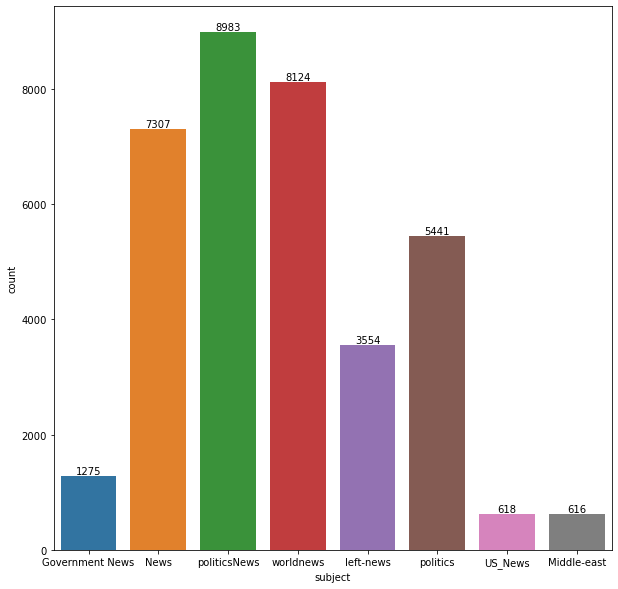

In [56]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = subject_train)
plot.bar_label(plot.containers[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

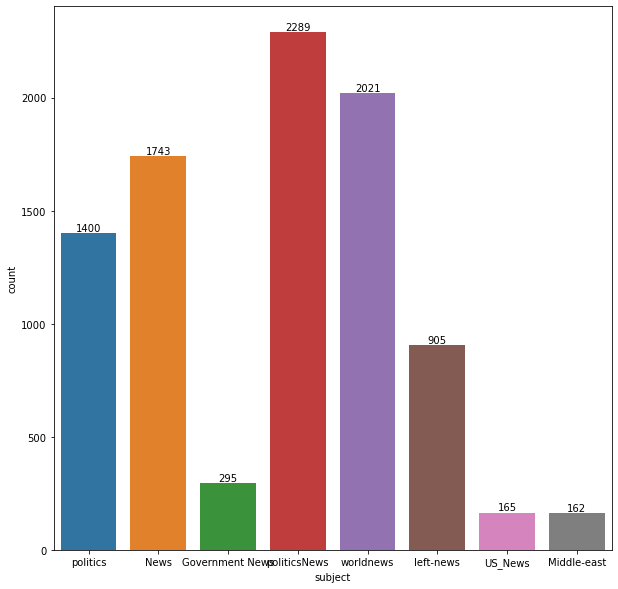

In [57]:
plt.figure(figsize= (10, 10))
plot = sns.countplot(x = subject_test)
plot.bar_label(plot.containers[0])
plt.show

In [58]:
pipelineSubject = Pipeline([('bow', CountVectorizer(analyzer=text_process)), ('tfidf', TfidfTransformer()), ('classifier', MLPClassifier(verbose = 2, hidden_layer_sizes=(100,50, 8), random_state=0, early_stopping=True, max_iter= 22, n_iter_no_change =5))])

In [59]:
pipelineSubject.fit(alltex_train, subject_train)

Iteration 1, loss = 1.21053643
Validation score: 0.778396
Iteration 2, loss = 0.45438485
Validation score: 0.812361
Iteration 3, loss = 0.31417595
Validation score: 0.793987
Iteration 4, loss = 0.26565381
Validation score: 0.767539
Iteration 5, loss = 0.23382729
Validation score: 0.756682
Iteration 6, loss = 0.21471861
Validation score: 0.750278
Iteration 7, loss = 0.20241891
Validation score: 0.748886
Iteration 8, loss = 0.19450051
Validation score: 0.747216
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B1EBA451F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50, 8), max_iter=22,
                               n_iter_no_change=5, random_state=0,
                               verbose=2))])

In [60]:
predictionSubject = pipelineSubject.predict(alltex_test)

In [61]:
print(classification_report(subject_test, predictionSubject))
print(confusion_matrix(subject_test, predictionSubject))

                 precision    recall  f1-score   support

Government News       0.20      0.04      0.07       295
    Middle-east       0.00      0.00      0.00       162
           News       0.95      0.98      0.96      1743
        US_News       0.50      0.87      0.64       165
      left-news       0.14      0.02      0.03       905
       politics       0.51      0.87      0.65      1400
   politicsNews       0.97      0.98      0.97      2289
      worldnews       0.96      0.98      0.97      2021

       accuracy                           0.81      8980
      macro avg       0.53      0.59      0.54      8980
   weighted avg       0.76      0.81      0.77      8980

[[  13    0    8    0    3  255    7    9]
 [   6    0    4  141    0    0   11    0]
 [   0    0 1707    0    2   30    0    4]
 [   5    2    6  143    0    2    3    4]
 [  11    0   20    0   14  854    2    4]
 [  30    0   50    0   76 1217   17   10]
 [   0    0    1    0    2   10 2232   44]
 [   0    0 

From what we can see the models accuracy is 81%, this is shown within the classification report. But there is a major problem, since most of data is coming from politicalNews and worldNews, so it is somewhat unbalanced when classifying. Another interesting thing within the classification matrix is that Middle-east has 0 for precision recall and f1-score, this could be an issue with how the model is classifying the data. The model is good at classifying politicsnews and world news along with news, but it has a hard time with government news and left news. The macro avg are also somewhat low since they are close to the 50% mark